In [1]:
%pylab inline

import pandas as pd
import seaborn as sns
sns.set()
import pickle
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open('expdf.pickle', 'rb') as read_expdf:
    ppg = pickle.load(read_expdf)

In [3]:
with open('colors.pickle', 'rb') as read_colors:
    color_set = pickle.load(read_colors)

In [ ]:
color_set = list(color_set)

In [ ]:
color_set

In [ ]:
for color in color_set:
    try:
        ppg.drop(columns=color,inplace=True)
    except:
        continue

In [ ]:
rare_columns = []
for col in ppg.columns:
    if ppg[col].count() < 2000:
        rare_columns.append(col)

In [ ]:
len(rare_columns)

In [ ]:
pareto_columns = []
for col in ppg.columns:
    if ppg[col].count() >= 2000:
        pareto_columns.append(col)

In [ ]:
pareto_columns

In [ ]:
len(pareto_columns)

In [ ]:
ppg[pareto_columns].head()

In [ ]:
ppg.drop(rare_columns,inplace=True,axis=1)

In [ ]:
ppg.count().sort_values()

In [6]:
ppg.dtypes

Name                     object
Link                     object
Brand_Series             object
Estimated_Value         float64
Category_Names           object
                         ...   
Production_Exclusive    float64
Comic_Con               float64
Retail_Exclusive        float64
Evergreen               float64
# of Figures              int64
Length: 3732, dtype: object

In [4]:
miss_year = ppg[ppg['Produced:'].isnull()]['Link']

In [264]:
miss_year

1950-s-elvis-metallic-gold                                                                   1950-s-elvis-metallic-gold
1970-s-elvis                                                                                               1970-s-elvis
1970-s-elvis-glow-in-the-dark-479dfff4-e35a-41ac-a66c-20b80117df2c    1970-s-elvis-glow-in-the-dark-479dfff4-e35a-41...
aj-styles-c484d9b0-4b6a-4000-9829-f854bf435e01                           aj-styles-c484d9b0-4b6a-4000-9829-f854bf435e01
alan-carlos                                                                                                 alan-carlos
                                                                                            ...                        
yukon-cornelius                                                                                         yukon-cornelius
zero-5d289d8e-87e0-4f97-81a8-b3b650b14290                                     zero-5d289d8e-87e0-4f97-81a8-b3b650b14290
agent-carter-vinyl-art-toys             

In [265]:
ppg_dropmy = ppg.drop(miss_year)

In [267]:
ppg_dropmy.shape

(10609, 3733)

In [3]:
ppg['Produced:'].fillna(2018,inplace=True)

In [ ]:
pd.to_datetime(ppg['Produced:'],format='%Y')

In [ ]:
ppg['Produced:'].dtype

In [4]:
ppg['Produced:'] = ppg['Produced:'].astype(int)

In [5]:
ppg['Age'] = 2022 - ppg['Produced:']

In [6]:
ppg['# of Figures'] = ppg['# of Figures'].astype(int)

In [493]:
#10
brse_features = ['Evergreen', 'Pop! Television', 'Pop! Movies', 'Pop! Animation', 'Pop! Games', 'Comic_Con', 'Chase', 'Freddy Funko', 'Pop! Rocks', 'NFL']

In [494]:
brse_first = ['Estimated_Value','Evergreen', 'Pop! Television', 'Pop! Movies', 'Pop! Animation', 'Pop! Games']

In [495]:
brse_second = ['Comic_Con', 'Chase', 'Freddy Funko', 'Pop! Rocks', 'NFL','Estimated_Value']

In [496]:
#12
other_features = ['Production_Exclusive', 'Limited_Edition', 'Glow In Dark', 'Glitter', 'Flocked', 'Blind Packaging?:', 'Bobblehead', '# of Figures:', 'Autographed', 'Has_Accessory', 'Scale:', 'Age']

In [497]:
other_features_first = ['Estimated_Value','Produced:', 'Production_Exclusive', 'Limited_Edition', 'Glow In Dark', 'Glitter', 'Flocked']

In [498]:
other_features_second = ['Blind Packaging?:', 'Bobblehead', '# of Figures:', 'Autographed', 'Has_Accessory', 'Scale:', 'Age','Estimated_Value']

In [500]:
features = brse_features + other_features + produced

In [7]:
produced = ['Few_Produced','Rarely_Produced','Semi-Rarely_Produced','Moderately_Produced','Highly_Produced','Estimated_Value']

In [23]:
ppg['Estimated_Value']

12th-man                                         280.0
1950-s-elvis                                     710.0
1950-s-elvis-metallic-gold                      1780.0
1970-charger-w-dom-toretto                       105.0
1970-s-elvis                                     310.0
                                                 ...  
zen-oh-galactic-toys-exclusive                     9.0
zombie-venom-664-bobble-head-special-edition      22.0
venom-marvel-zombies                              26.0
zorak-sdcc                                        45.0
zorak                                             41.0
Name: Estimated_Value, Length: 10976, dtype: float64

In [43]:
ppg_myr = ppg[features].drop(miss_year)

In [ ]:
modeldf.head(10)

In [ ]:
modeldf.dtypes

In [ ]:
miss_year = modeldf[modeldf['Produced:'].isnull()]['Link']

In [ ]:
datetime.datetime.now().year

In [ ]:
modeldf['# of Figures:'].value_counts()

In [28]:
ppg[features].dtypes

Evergreen               float64
Pop! Television         float64
Pop! Movies             float64
Pop! Animation          float64
Pop! Games              float64
Comic_Con               float64
Chase                   float64
Freddy Funko            float64
Pop! Rocks              float64
NFL                     float64
Produced:                 int64
Production_Exclusive    float64
Limited_Edition         float64
Glow In Dark            float64
Glitter                 float64
Flocked                 float64
Blind Packaging?:         int64
Bobblehead              float64
# of Figures:            object
Autographed             float64
Has_Accessory           float64
Scale:                  float64
Age                       int64
Estimated_Value         float64
dtype: object

In [9]:
y = ppg['Estimated_Value']

In [ ]:
X = ppg['Number of Points of Articulation:']

In [ ]:
X.shape

In [59]:
ppg[brse_first].corr()

,Estimated_Value,Evergreen,Pop! Television,Pop! Movies,Pop! Animation,Pop! Games
Estimated_Value,1.000000,0.012414,-0.028657,-0.035508,-0.034657,-0.046566
Evergreen,0.012414,1.000000,-0.244928,-0.252200,-0.142774,-0.164790
Pop! Television,-0.028657,-0.244928,1.000000,-0.137846,-0.133284,-0.111194
Pop! Movies,-0.035508,-0.252200,-0.137846,1.000000,-0.125054,-0.104328
Pop! Animation,-0.034657,-0.142774,-0.133284,-0.125054,1.000000,-0.100875
Pop! Games,-0.046566,-0.164790,-0.111194,-0.104328,-0.100875,1.000000


In [56]:
ppg[brse_second].corr()

,Comic_Con,Chase,Freddy Funko,Pop! Rocks,NFL,Estimated_Value
Comic_Con,1.000000,-0.068736,0.234532,-0.049467,-0.056931,0.214055
Chase,-0.068736,1.000000,-0.026586,0.015558,-0.023479,0.024538
Freddy Funko,0.234532,-0.026586,1.000000,-0.022348,-0.013022,0.375109
Pop! Rocks,-0.049467,0.015558,-0.022348,1.000000,-0.019736,0.013731
NFL,-0.056931,-0.023479,-0.013022,-0.019736,1.000000,-0.018188
Estimated_Value,0.214055,0.024538,0.375109,0.013731,-0.018188,1.000000


In [60]:
ppg[other_features_first].corr()

,Estimated_Value,Produced:,Production_Exclusive,Limited_Edition,Glow In Dark,Glitter,Flocked
Estimated_Value,1.000000,-0.222058,0.112624,0.204038,0.099218,-0.000595,0.006636
Produced:,-0.222058,1.000000,0.042774,-0.100391,-0.009598,0.027463,0.005519
Production_Exclusive,0.112624,0.042774,1.000000,-0.042413,0.153846,0.080723,0.124383
Limited_Edition,0.204038,-0.100391,-0.042413,1.000000,0.040787,-0.013403,0.027310
Glow In Dark,0.099218,-0.009598,0.153846,0.040787,1.000000,0.007211,-0.028213
Glitter,-0.000595,0.027463,0.080723,-0.013403,0.007211,1.000000,-0.014914
Flocked,0.006636,0.005519,0.124383,0.027310,-0.028213,-0.014914,1.000000


In [61]:
ppg[other_features_second].corr()

,Blind Packaging?:,Bobblehead,Autographed,Has_Accessory,Scale:,Age,Estimated_Value
Blind Packaging?:,1.000000,0.017077,-0.006602,-0.024563,-0.002659,-0.031019,-0.007257
Bobblehead,0.017077,1.000000,-0.009065,0.282657,-0.002412,0.077782,0.031352
Autographed,-0.006602,-0.009065,1.000000,-0.017954,-0.012300,-0.058203,0.014426
Has_Accessory,-0.024563,0.282657,-0.017954,1.000000,-0.006871,0.068117,-0.016872
Scale:,-0.002659,-0.002412,-0.012300,-0.006871,1.000000,-0.095977,-0.012270
Age,-0.031019,0.077782,-0.058203,0.068117,-0.095977,1.000000,0.222058
Estimated_Value,-0.007257,0.031352,0.014426,-0.016872,-0.012270,0.222058,1.000000


In [503]:
ppg[produced].corr()

,Few_Produced,Rarely_Produced,Semi-Rarely_Produced,Moderately_Produced,Highly_Produced,Estimated_Value
Few_Produced,1.000000,0.653913,0.653913,0.452641,-0.452641,0.471539
Rarely_Produced,0.653913,1.000000,1.000000,0.692204,-0.692204,0.489137
Semi-Rarely_Produced,0.653913,1.000000,1.000000,0.692204,-0.692204,0.489137
Moderately_Produced,0.452641,0.692204,0.692204,1.000000,-1.000000,0.390568
Highly_Produced,-0.452641,-0.692204,-0.692204,-1.000000,1.000000,-0.390568
Estimated_Value,0.471539,0.489137,0.489137,0.390568,-0.390568,1.000000


In [31]:
corr_matrix = ppg[features].corr()

In [34]:
sorted_matrix = corr_matrix.unstack().sort_values(ascending=False) 

In [35]:
print(sorted_matrix)

Evergreen        Evergreen          1.000000
Limited_Edition  Limited_Edition    1.000000
Pop! Animation   Pop! Animation     1.000000
Pop! Games       Pop! Games         1.000000
Comic_Con        Comic_Con          1.000000
                                      ...   
Pop! Television  Evergreen         -0.244928
Evergreen        Pop! Movies       -0.252200
Pop! Movies      Evergreen         -0.252200
Age              Produced:         -1.000000
Produced:        Age               -1.000000
Length: 529, dtype: float64


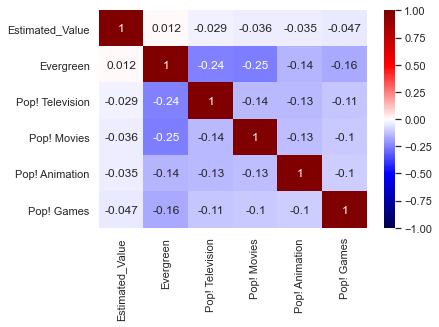

In [62]:
sns.heatmap(ppg[brse_first].corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

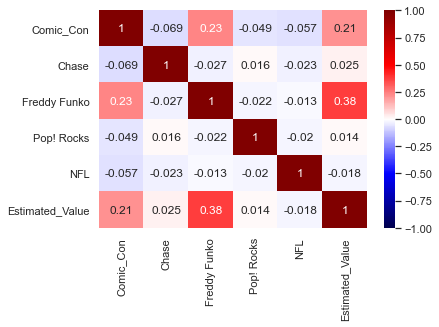

In [63]:
sns.heatmap(ppg[brse_second].corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

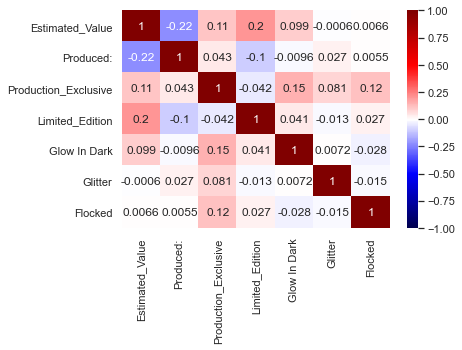

In [64]:
sns.heatmap(ppg[other_features_first].corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

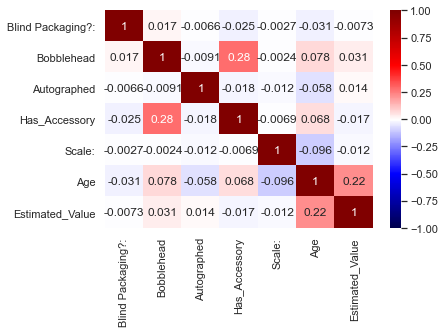

In [65]:
sns.heatmap(ppg[other_features_second].corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

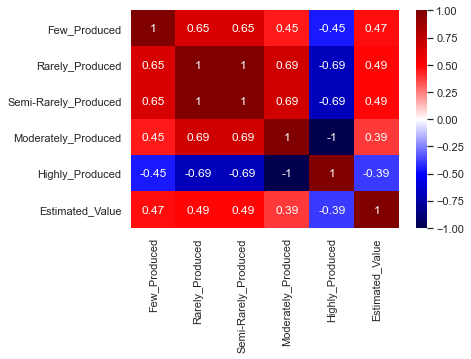

In [504]:
sns.heatmap(ppg[produced].corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

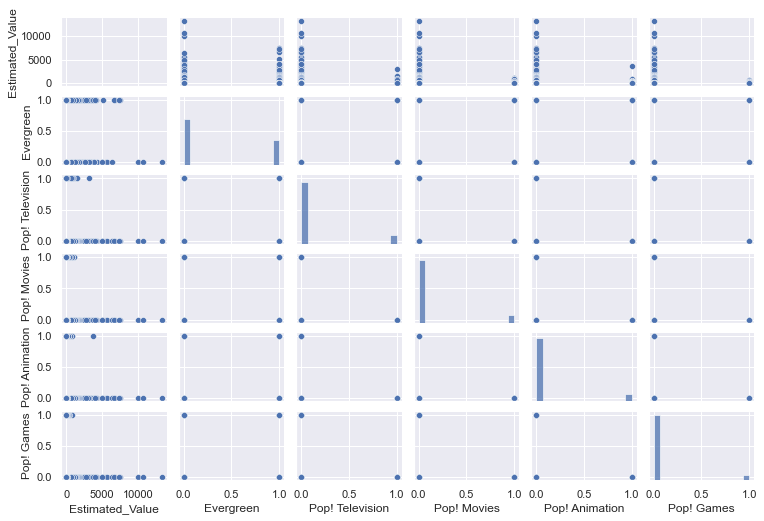

In [66]:
sns.pairplot(ppg[brse_first], height=1.2, aspect=1.5);

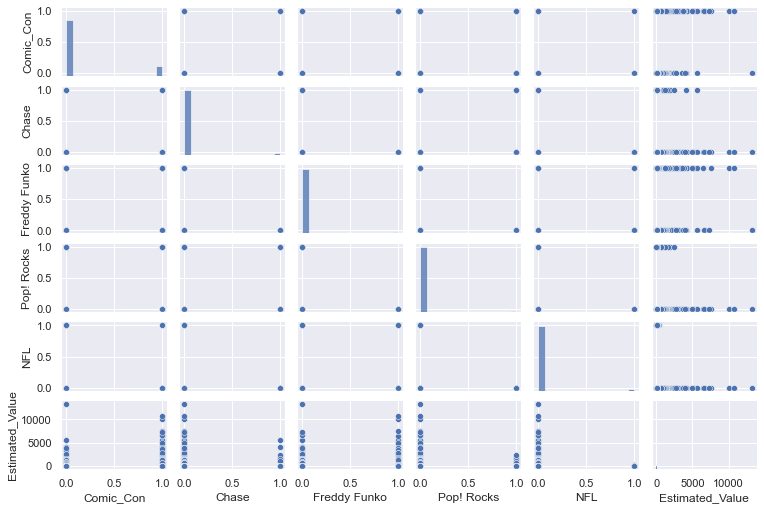

In [67]:
sns.pairplot(ppg[brse_second], height=1.2, aspect=1.5);

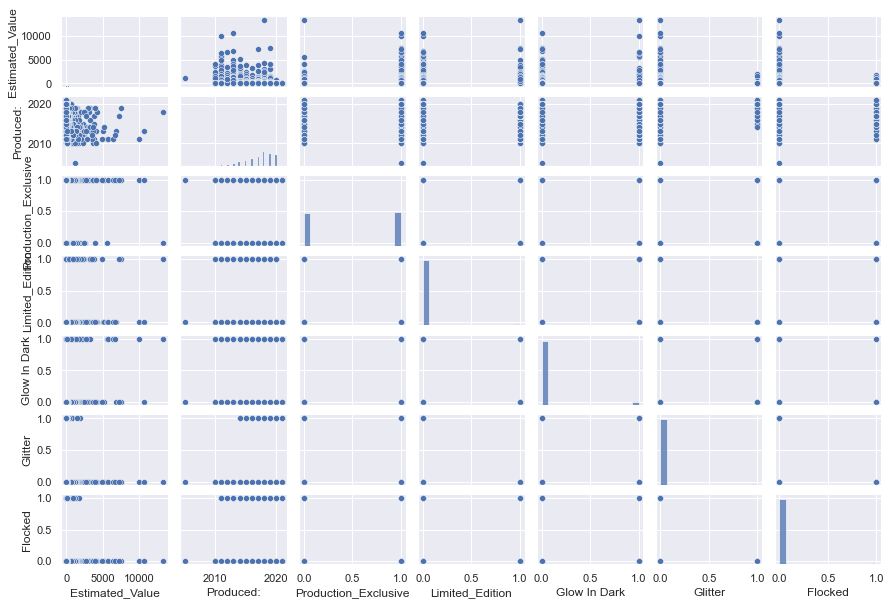

In [68]:
sns.pairplot(ppg[other_features_first], height=1.2, aspect=1.5);

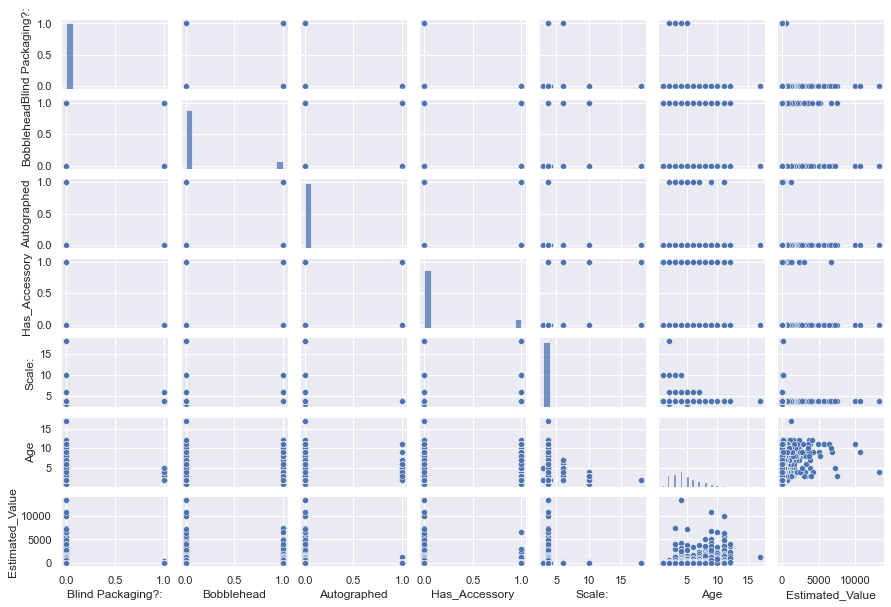

In [69]:
sns.pairplot(ppg[other_features_second], height=1.2, aspect=1.5);

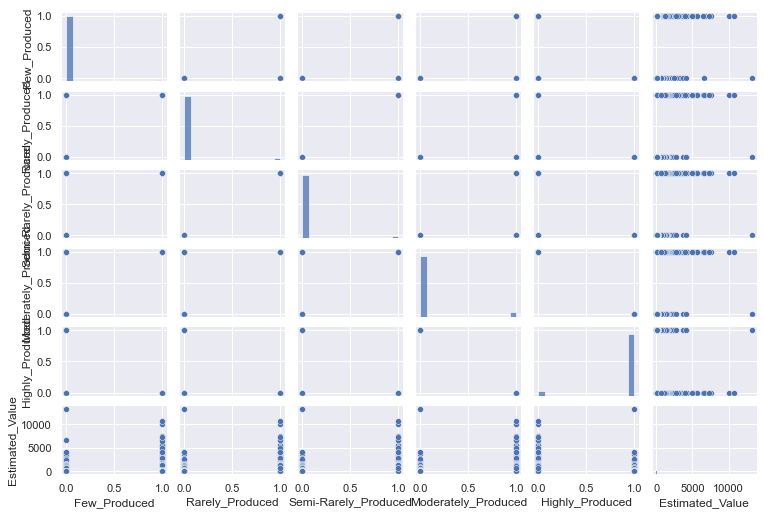

In [505]:
sns.pairplot(ppg[produced], height=1.2, aspect=1.5);

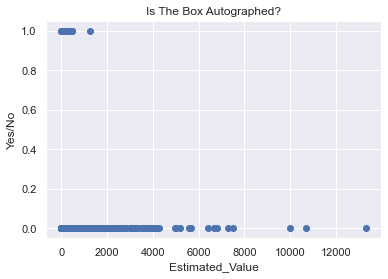

In [89]:
plt.scatter(ppgno1['Estimated_Value'],ppgno1['Autographed'])
plt.xlabel('Estimated_Value')
plt.ylabel('Yes/No')
plt.title('Is The Box Autographed?');
plt.savefig('autograph.svg',transparent=True)

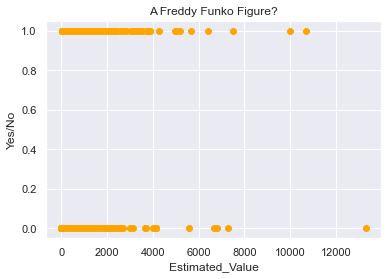

In [91]:
plt.scatter(ppgno1['Estimated_Value'],ppgno1['Freddy Funko'],color='orange')
plt.xlabel('Estimated_Value')
plt.ylabel('Yes/No')
plt.title('A Freddy Funko Figure?');
plt.savefig('freddy.svg',transparent=True)

In [71]:
featureset = ['Comic_Con', 'Chase', 'Freddy Funko', 'Production_Exclusive', 'Limited_Edition', 'Glow In Dark', 'Age']

In [268]:
X = ppg_dropmy[featureset]

In [270]:
y = ppg_dropmy['Estimated_Value']

In [271]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=.2, random_state=88) #hold out 20% of the data for final testing

In [272]:
X_train_val, y_train_val = np.array(X_train_val), np.array(y_train_val)

In [273]:
lm = LinearRegression()

In [274]:
cross_val_score(lm, X_train_val, y_train_val, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

array([0.2066811 , 0.21469339, 0.28536509, 0.1241616 , 0.17589409])

In [275]:
poly = PolynomialFeatures(interaction_only=True)
X_train_val_poly = poly.fit_transform(X_train_val)

In [276]:
X_train_val.shape

(8487, 7)

In [277]:
X_train_val_poly.shape

(8487, 29)

In [278]:
lm = LinearRegression()

In [279]:
cross_val_score(lm, X_train_val_poly, y_train_val, cv=5, scoring='r2')

array([0.31365177, 0.3824531 , 0.49051142, 0.21732646, 0.25809853])

In [153]:
X_all = ppg[features]

In [154]:
X_all_train_val, X_all_test, y_all_train_val, y_all_test = train_test_split(X_all, y, test_size=.2, random_state=88)

In [129]:
X_all_train_val, y_all_train_val = np.array(X_all_train_val), np.array(y_all_train_val)

In [97]:
lm_all = LinearRegression()
cross_val_score(lm_all, X_all_train_val, y_all_train_val, cv=5, scoring='r2')

array([0.2653741 , 0.21748845, 0.19941567, 0.22096743, 0.31209851])

In [160]:
std = StandardScaler()

In [161]:
std.fit(X_all_train_val.values)
X_trval = std.transform(X_all_train_val.values)

In [138]:
poly = PolynomialFeatures(interaction_only=True)
X_all_train_val_poly = poly.fit_transform(X_all_train_val)

In [166]:
poly = PolynomialFeatures(interaction_only=True)
X_all_train_val_poly = poly.fit_transform(X_trval)

In [99]:
X_all_train_val.shape

(8780, 22)

In [111]:
X_all_train_val_poly.shape

(8780, 254)

In [112]:
lm_all = LinearRegression()
cross_val_score(lm_all, X_all_train_val_poly, y_all_train_val, cv=5, scoring='r2')

array([-9.75231045e+15, -1.11825713e+07, -1.05876912e+18, -1.31534483e+16,
       -2.99985042e+14])

In [167]:
alphavec = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphavec, cv=5, max_iter=10000)
lasso_model.fit(X_all_train_val_poly, y_all_train_val)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5, max_iter=10000)

In [168]:
lasso_model.alpha_

2.049074689815848

In [708]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x2 x3',
 'x2 x4',
 'x3 x4']

In [749]:
list(zip(poly.get_feature_names(), lasso_model.coef_))

[('1', 0.0),
 ('x0', 14.941832183986442),
 ('x1', 297.5893235261515),
 ('x2', 142.01152837811517),
 ('x3', 66.77500386209711),
 ('x4', 37.715528327778074),
 ('x0 x1', 46.28109603903262),
 ('x0 x2', 346.08328968714534),
 ('x0 x3', 536.67118339815),
 ('x0 x4', 629.6784632586256),
 ('x1 x2', 14.777027299094161),
 ('x1 x3', 484.89787688077),
 ('x1 x4', 297.3785428498911),
 ('x2 x3', 0.0),
 ('x2 x4', 0.0),
 ('x3 x4', 214.47584794680944)]

In [151]:
X_all_train_val.columns

Index(['Evergreen', 'Pop! Television', 'Pop! Movies', 'Pop! Animation',
       'Pop! Games', 'Comic_Con', 'Chase', 'Freddy Funko', 'Pop! Rocks', 'NFL',
       'Production_Exclusive', 'Limited_Edition', 'Glow In Dark', 'Glitter',
       'Flocked', 'Blind Packaging?:', 'Bobblehead', '# of Figures:',
       'Autographed', 'Has_Accessory', 'Scale:', 'Age'],
      dtype='object')

In [193]:
lasso_model.score(X_all_train_val_poly,y_all_train_val)

0.42904001589095075

In [170]:
list(zip(X_all_train_val_poly.columns, lasso_model.coef_))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [132]:
new_subset = ['Comic_Con', 'Chase', 'Freddy Funko', 'Production_Exclusive', 'Limited_Edition', 'Glow In Dark', 'Age','Bobblehead']

In [294]:
addprod = ['Comic_Con', 'Chase', 'Freddy Funko', 'Production_Exclusive', 'Limited_Edition', 'Glow In Dark', 'Age','Bobblehead', 'Rarely_Produced','Moderately_Produced']

In [337]:
new_all = ['Comic_Con', 'Chase', 'Freddy Funko', 'Production_Exclusive', 'Limited_Edition', 'Glow In Dark', 'Age','Bobblehead', 'Rarely_Produced','Moderately_Produced', 'Pop! Television', 'Pop! Movies', 'Pop! Animation', 'Pop! Games','Glitter','Flocked','Autographed']

In [343]:
all_glam =  ['Comic_Con', 'Chase', 'Freddy Funko', 'Production_Exclusive', 'Limited_Edition', 'Glow In Dark', 'Age','Bobblehead', 'Rarely_Produced','Moderately_Produced','Glitter','Flocked','Autographed']

In [296]:
new_add_glam = ['Comic_Con', 'Chase', 'Freddy Funko', 'Production_Exclusive', 'Limited_Edition', 'Glow In Dark', 'Age','Bobblehead','Glitter','Flocked','Autographed']

In [307]:
new_glitz_glam =  ['Comic_Con', 'Chase', 'Freddy Funko', 'Production_Exclusive', 'Limited_Edition', 'Glow In Dark', 'Age','Bobblehead', 'Pop! Television', 'Pop! Movies', 'Pop! Animation', 'Pop! Games','Glitter','Flocked','Autographed']

In [301]:
bare = ['Comic_Con','Chase','Freddy Funko']

In [59]:
trimmed = ['Comic_Con', 'Chase', 'Freddy Funko', 'Production_Exclusive', 'Limited_Edition', 'Age'] #Further removing Age and Chase

In [317]:
tweaks =  ['Comic_Con', 'Chase', 'Freddy Funko', 'Production_Exclusive', 'Limited_Edition', 'Glow In Dark', 'Age','Bobblehead', 'Pop! Television', 'Pop! Movies','Glitter','Flocked','Autographed']

In [324]:
lesssparkle = ['Comic_Con', 'Chase', 'Freddy Funko', 'Production_Exclusive', 'Limited_Edition', 'Glow In Dark', 'Age','Bobblehead', 'Pop! Television', 'Pop! Movies', 'Pop! Animation', 'Pop! Games','Autographed']

In [10]:
spliteg = ['Comic_Con', 'Chase', 'Freddy Funko', 'Production_Exclusive', 'Limited_Edition', 'Glow In Dark', 'Age', 'Pokemon','Star Wars', 'Harry Potter', 'Dragon Ball','Pop! Disney','Marvel', 'DC Comics']

In [66]:
addRE = ['Comic_Con', 'Chase', 'Freddy Funko', 'Production_Exclusive', 'Limited_Edition', 'Glow In Dark', 'Age','Bobblehead','Retail_Exclusive']

In [565]:
bare2 = ['Few_Produced','Bobblehead','Freddy Funko','Comic_Con','Chase','Limited_Edition','Glow In Dark']

In [408]:
addback = ['Rarely_Produced','Limited_Edition','Freddy Funko','Comic_Con','Chase','Bobblehead']

In [664]:
bare3 = ['Few_Produced','Rarely_Produced','Bobblehead','Freddy Funko','Comic_Con','Chase','Limited_Edition','Glow In Dark']

In [59]:
baremin = ['# Produced:','Freddy Funko','Limited_Edition','Comic_Con']

In [13]:
bare4 = ['Few_Produced','Rarely_Produced','Freddy Funko','Limited_Edition','Comic_Con']

In [11]:
ppgno1[bare4].corr()
plt.savefig('lrcorrmat.svg')

<Figure size 432x288 with 0 Axes>

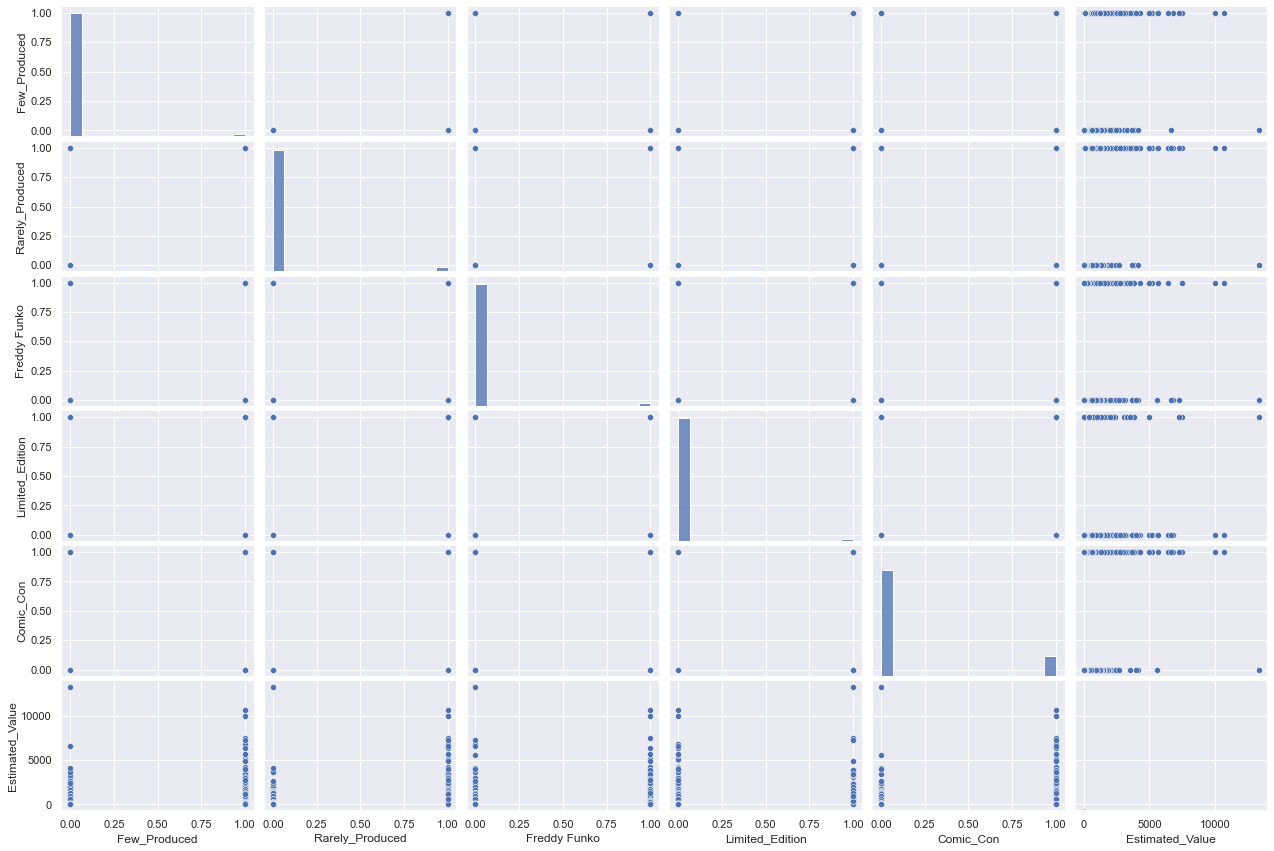

In [772]:
sns.pairplot(ppg[bare5], height=2.0, aspect=1.5);
plt.savefig('lr_pair.svg',format='svg')

In [10]:
bare5 = ['Few_Produced','Rarely_Produced','Freddy Funko','Limited_Edition', 'Comic_Con','Estimated_Value']

In [656]:
ppgno1[bare5].corr()

,Few_Produced,Rarely_Produced,Freddy Funko,Limited_Edition,Estimated_Value
Few_Produced,1.000000,0.653911,0.421202,0.071544,0.471534
Rarely_Produced,0.653911,1.000000,0.461368,0.127443,0.489130
Freddy Funko,0.421202,0.461368,1.000000,0.129549,0.375101
Limited_Edition,0.071544,0.127443,0.129549,1.000000,0.204030
Estimated_Value,0.471534,0.489130,0.375101,0.204030,1.000000


In [15]:
X = ppgno1[bare4]

In [16]:
y = ppgno1['Estimated_Value']

In [65]:
#'Star Wars', 'Harry Potter', 'Dragon Ball','Pop! Disney','Marvel', 'DC Comics'
ppg['Retail_Exclusive'].fillna(0,inplace=True)

In [18]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=.2, random_state=88)
#X_train_val, y_train_val = np.array(X_train_val), np.array(y_train_val)

In [63]:
lm = LinearRegression()
cross_val_score(lm, X_train_val, y_train_val, cv=10, scoring='r2')

array([0.37074054, 0.25927346, 0.22611478, 0.13155973, 0.28189845,
       0.32108596, 0.24418284, 0.27215495, 0.27464213, 0.33259926])

In [65]:
lm = LinearRegression()
cross_val_score(lm, X_train_val_poly, y_train_val, cv=10, scoring='r2')

array([0.45912207, 0.28159748, 0.2983553 , 0.23842438, 0.30580057,
       0.2647327 , 0.31055752, 0.33856281, 0.29766928, 0.46328742])

In [722]:
lm = LinearRegression()
cross_val_score(lm, X_train_val_poly, y_train_val, cv=10, scoring='neg_root_mean_squared_error')

array([-184.56398349, -231.55762735, -298.13380188, -178.57297404,
       -265.88752029, -215.40440277, -355.60722552, -178.38480415,
       -187.10789755, -253.94143518])

In [723]:
lm = LinearRegression()
cross_val_score(lm, X_train_val_poly, y_train_val, cv=10, scoring='neg_mean_absolute_error')

array([-57.68243652, -64.2051823 , -61.71309442, -57.43541654,
       -61.16720043, -67.09470658, -71.61229675, -66.44706019,
       -62.67053369, -67.65516772])

In [19]:
poly = PolynomialFeatures(interaction_only=True)
X_train_val_poly = poly.fit_transform(X_train_val)

In [739]:
#woCC --> bare min, no rare
average([0.36168773, 0.38800687, 0.46346008, 0.38971026, 0.41723545,
       0.32772026, 0.40308434, 0.52478357, 0.26864154, 0.60385492])

0.414818502

In [687]:
var([0.34645611, 0.41443869, 0.42234418, 0.26803967, 0.43041205,
       0.3327388 , 0.36832834, 0.42337625, 0.28332247, 0.60252109])

0.008144827501242683

In [671]:
#bare5(withCC)
average([0.36170155, 0.38795746, 0.46336535, 0.38937113, 0.41722135,
       0.32890541, 0.40308919, 0.52472419, 0.26877828, 0.60391202])

0.414902593

In [678]:
var([0.36170155, 0.38795746, 0.46336535, 0.38937113, 0.41722135,
       0.32890541, 0.40308919, 0.52472419, 0.26877828, 0.60391202])

0.008323499570825862

In [663]:
#oldmodel
average([0.34150119, 0.51266784, 0.33713879, 0.27404443, 0.48032027,
       0.33830651, 0.33429765, 0.31254356, 0.40004224, 0.36318221])

0.369404469

In [679]:
var([0.34150119, 0.51266784, 0.33713879, 0.27404443, 0.48032027,
       0.33830651, 0.33429765, 0.31254356, 0.40004224, 0.36318221])

0.005015003672560188

In [700]:
lm.fit(X_train_val_poly,y_train_val)

LinearRegression()

In [701]:
pred = lm.predict(X_train_val_poly)

In [473]:
pred

array([122.03421748,  34.49236126,  34.49236126, ...,  26.92040209,
        34.49236126,  34.49236126])

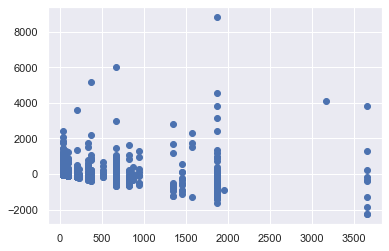

In [702]:
res = y_train_val - pred
plt.scatter(x=pred, y=res)

In [703]:
#ppg['res'] = 
#ppg.sort_values(['res']).head()
res.sort_values()

heimdall-brown-skin-freddy-funko                              -2270.211678
freddy-funko-superman-white-lantern                           -2260.211678
ghost-rider-freddy-funko                                      -1860.211678
freddy-funko-red-tie                                          -1615.076946
stan-lee-red-shirt                                            -1425.076946
                                                                  ...     
stan-lee-superhero-red-metallic                                4122.845480
frankenberry-glow-in-the-dark-freddy-funko                     4524.923054
boo-berry-glow-in-the-dark                                     5192.555083
holographic-darth-maul-2da9c975-e490-4d85-a0f3-e4285091dead    5989.328425
jaime-lannister-bloody-freddy-funko                            8834.923054
Name: Estimated_Value, Length: 8777, dtype: float64

((array([-3.77824095, -3.55127305, -3.42658107, ...,  3.42658107,
          3.55127305,  3.77824095]),
  array([-2270.21167759, -2260.21167759, -1860.21167759, ...,
          5192.55508266,  5989.32842499,  8834.92305422])),
 (117.04664562501263, -3.335383230655883e-14, 0.5034589745997473))

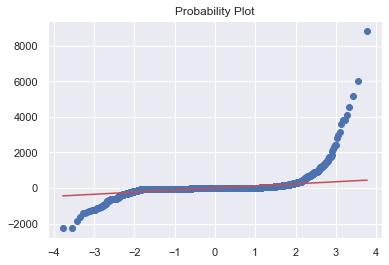

In [704]:
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
stats.probplot(res, dist="norm", plot=plt)

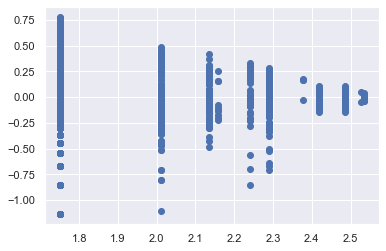

In [627]:
#reran after boxcox trans.
lm.fit(X_train_val_poly,y_train_val)
pred = lm.predict(X_train_val_poly)
res = y_train_val - pred
plt.scatter(x=pred, y=res)
plt.xlabel='predict'
plt.ylabel='residuals'
plt.show()

Text(0.5, 1.0, 'Normal Q-Q plot')

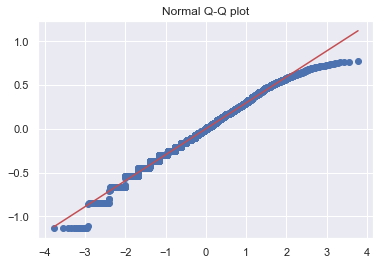

In [628]:
stats.probplot(res, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")

In [147]:
res.sort_values()

sara-ryder-masked                                       -1.864866
huntress-birds-of-prey-collectible-cards                -1.780288
father-of-ultra-vinyl-art-toys                          -1.604445
jeff-spicoli-trophy                                     -1.547161
dryden-gangster                                         -1.128099
                                                           ...   
spider-man-first-appearance-signed-by-tom-holland        0.948454
clockwork-orange-4d9dcd17-1d04-4a54-af96-97736f186481    0.967630
andy-dwyer-johnny-karate                                 0.986797
the-mandalorian-signed-by-pedro-pascal                   0.987508
mark-hamill-black-tee                                    1.049417
Name: Estimated_Value, Length: 8780, dtype: float64

In [153]:
res

yukon-cornelius                                        0.363456
william-wallace                                        0.266364
black-panther-civil-war-unmasked                       0.054614
bride-kevin                                           -0.223937
ferris-bueller-dancing                                 0.374178
                                                         ...   
stantz-marshmallow-freddy-funko                        0.022555
domo-ghostbuster                                      -0.074225
hawkeye-endgame                                       -0.172251
naruto-uzumaki-755874e3-51f3-4eac-b87d-728013e1e045    0.132228
yesss                                                 -0.437814
Name: Estimated_Value, Length: 8780, dtype: float64

In [ ]:
mae(y_train_val, test_set_pred)

In [235]:
#std = StandardScaler()
#std.fit(X_train_val.values)
#X_trval = std.transform(X_train_val.values)

In [139]:
poly = PolynomialFeatures(interaction_only=True)
X_train_val_poly = poly.fit_transform(X_train_val)

In [20]:
alphavec = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphavec, cv=10, max_iter=50000)
lasso_model.fit(X_train_val_poly, y_train_val)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=10, max_iter=50000)

In [21]:
lasso_model.score(X_train_val_poly,y_train_val)

0.4771196634760483

In [555]:
list(zip(X_train_val.columns, lasso_model.coef_))

[('Few_Produced', 599.9452132959079),
 ('Rarely_Produced', 501.2520793065068),
 ('Freddy Funko', 398.0022952401052),
 ('Limited_Edition', 334.12805208365376)]

In [20]:
lasso_model.alpha_

0.6747544053110693

In [21]:
lasso_model.intercept_

36.724762784423625

In [22]:
lpred = lasso_model.predict(X_train_val_poly)

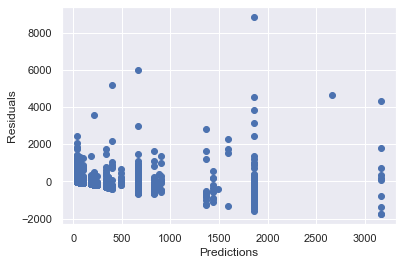

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
lres = y_train_val - lpred
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.scatter(x=lpred, y=lres)
plt.show();
plt.savefig('respred.svg')

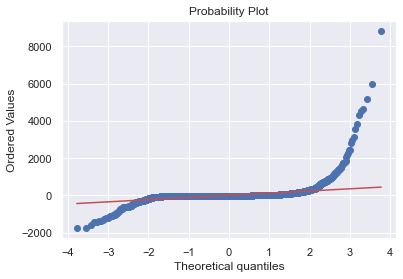

In [25]:
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
stats.probplot(lres, dist="norm", plot=plt);
plt.savefig('lrpp.svg',transparent=True)

In [24]:
poly = PolynomialFeatures(interaction_only=True)
X_test = poly.fit_transform(X_test)
lpred_test = lasso_model.predict(X_test)

In [25]:
lasso_model.score(X_test,y_test)

0.2283993486892505

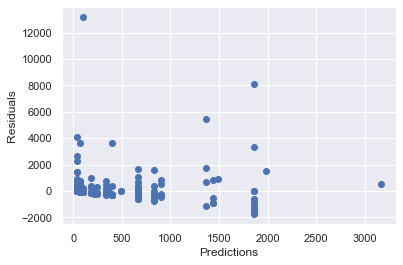

In [26]:
lres_test = y_test - lpred_test
plt.scatter(x=lpred_test, y=lres_test)
plt.xlabel('Predictions')
plt.ylabel('Residuals');
plt.savefig('respred.svg');

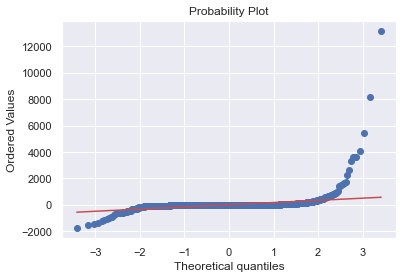

In [33]:
stats.probplot(lres_test, dist="norm", plot=plt);
plt.savefig('lrpp.svg',transparent=True)

In [728]:
lres.sort_values()

heimdall-brown-skin-freddy-funko                              -1776.001306
freddy-funko-superman-white-lantern                           -1766.001306
freddy-funko-red-tie                                          -1603.181394
freddy-funko-black-and-white                                  -1413.181394
stan-lee-red-shirt                                            -1413.181394
                                                                  ...     
frankenberry-glow-in-the-dark-freddy-funko                     4536.818606
stan-lee-superhero-red-metallic                                4626.870539
boo-berry-glow-in-the-dark                                     5174.462985
holographic-darth-maul-2da9c975-e490-4d85-a0f3-e4285091dead    5990.591843
jaime-lannister-bloody-freddy-funko                            8846.818606
Name: Estimated_Value, Length: 8777, dtype: float64

In [768]:
lres_test.sort_values()

freddy-funko-dark-bronze-chrome                -1778.181394
leonardo-freddy-funko                          -1513.181394
freddy-funko-orange-hair                       -1443.181394
stan-lee-blue-shirt                            -1343.181394
martian-freddy-funko                           -1213.181394
                                                   ...     
planet-arlia-vegeta                             3625.559709
superman-bobble-head-metallic                   4103.275237
dumbo-clown                                     5429.690451
count-chocula-glow-in-the-dark-freddy-funko     8136.818606
clockwork-orange-glow-in-the-dark              13196.500233
Name: Estimated_Value, Length: 2195, dtype: float64

In [767]:
sns.residplot(x=bare4, y=y, data=ppgno1, scatter_kws={"s": 80});

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 5 and the array at index 1 has size 10972

In [764]:
#ppgres = pd.DataFrame({ 
   # 'X':ppgno1[bare4],
   # 'Y':ppgno1['Estimated_Value'],
   # })

sns.residplot('X','Y',data={'X':ppgno1[bare4],'Y':ppgno1['Estimated_Value']})

/Users/chuckcao/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: regplot inputs must be 1d

In [ ]:
#X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=88)
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=23)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X[:,None],y)

In [ ]:
lr.score(X[:,None], y)

In [ ]:
y = ppg['Estimated_Value']

In [ ]:
X = ppg[['Number of Points of Articulation:','Flocked','Glow In Dark','Glitter']]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=88)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=23)

In [ ]:
lr2 = LinearRegression()

In [ ]:
lr2.fit(X,y)

In [ ]:
lr2.score(X,y)

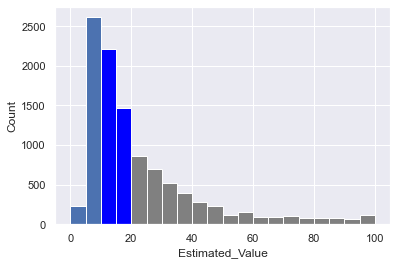

In [8]:
ppgno1['Estimated_Value'].hist(bins=2,range=[0, 10])
ppgno1['Estimated_Value'].hist(bins=2,range=[10, 20],color='blue')
ppgno1['Estimated_Value'].hist(bins=16,range=[20, 100],color='grey')
plt.xlabel('Estimated_Value')
plt.ylabel('Count')
plt.savefig('funkohist.svg')

<AxesSubplot:>

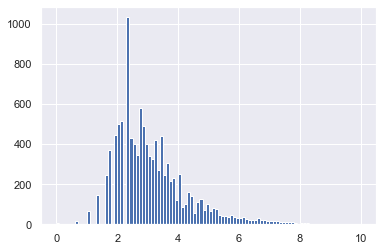

In [119]:
log(ppg['Estimated_Value']).hist(bins=100,range=[0, 10])

<AxesSubplot:>

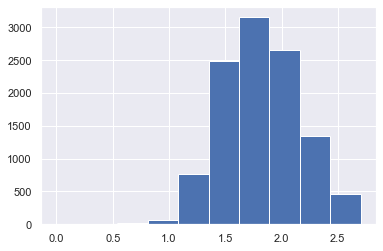

In [142]:
y_tr.hist()

In [123]:
ppg['Estimated_Value'].sort_values().head(10)

jeff-spicoli-trophy                         1.0
sara-ryder-masked                           1.0
father-of-ultra-vinyl-art-toys              1.0
huntress-birds-of-prey-collectible-cards    1.0
hulk-w-gauntlet-orange-chrome               2.0
dryden-gangster                             2.0
knight-of-ren-arm-cannon-vinyl-art-toys     2.0
baron-samedi-vinyl-art-toys                 2.0
sho                                         2.0
hulk-w-gauntlet-red-chrome                  2.0
Name: Estimated_Value, dtype: float64

In [125]:
ppg['Estimated_Value'].sort_values().tail(10)

boo-berry-glow-in-the-dark                                      5570.0
buzz-lightyear-glow-in-the-dark-freddy-funko                    5680.0
frankenberry-glow-in-the-dark-freddy-funko                      6400.0
holographic-darth-maul-2da9c975-e490-4d85-a0f3-e4285091dead     6660.0
dumbo-clown                                                     6790.0
stan-lee-superhero-red-metallic                                 7290.0
freddy-funko-as-venom                                           7500.0
count-chocula-glow-in-the-dark-freddy-funko                    10000.0
jaime-lannister-bloody-freddy-funko                            10710.0
clockwork-orange-glow-in-the-dark                              13300.0
Name: Estimated_Value, dtype: float64

In [454]:
lamb=stats.boxcox_normmax(ppgno1['Estimated_Value'])
print("Lambda:", lamb)

Lambda: -0.37414501047194715


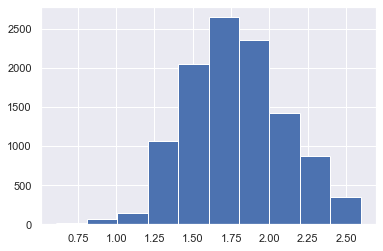

In [622]:
y_tr=(np.power(ppgno1['Estimated_Value'],lamb)-1)/lamb
plt.hist(y_tr);

In [141]:
print(y_tr.head())

12th-man                      2.424720
1950-s-elvis                  2.530397
1950-s-elvis-metallic-gold    2.605398
1970-charger-w-dom-toretto    2.267898
1970-s-elvis                  2.438064
Name: Estimated_Value, dtype: float64


In [3]:
onlydol = ppg[ppg['Estimated_Value']==1]['Link']

In [161]:
ppg['Estimated_Value'].mean()

79.93668002915452

In [162]:
ppg['Estimated_Value'].mode()

0    10.0
dtype: float64

In [163]:
ppg['Estimated_Value'].median()

18.0

In [4]:
ppgno1 = ppg.drop(onlydol)

In [173]:
ppgno1

,Name,Link,Brand_Series,Estimated_Value,Category_Names,Category_Values,Production_Status,Produced:,# Produced:,Material:,...,Dark Violet,Matte,Has_Accessory,Limited_Edition,Production_Exclusive,Comic_Con,Retail_Exclusive,Evergreen,# of Figures,Age
12th-man,12th Man Freddy Funko,12th-man,"[Funko, Freddy Funko, Pop! Vinyl, Pop! Funko, ...",280.0,"[Produced:, # Produced:, Material:, Scale:, Ge...","[From: 2016, 250, Plastic, 3.75"", Male, Silver...","[Exclusive, Limited Edition]",2016,250.0,Plastic,...,NaN,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1,6
1950-s-elvis,1950's Elvis,1950-s-elvis,"[Funko, Pop! Vinyl, Pop! Rocks, Elvis Presley,...",710.0,"[Produced:, Material:, Gender:, Color:, Number...","[From: 2011, Plastic, Male, Black, Silver, Blu...","[Exclusive, Limited Edition]",2011,NaN,Plastic,...,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.0,1,11
1950-s-elvis-metallic-gold,1950's Elvis (Metallic Gold),1950-s-elvis-metallic-gold,"[Funko, Pop! Vinyl, Chase Pieces, Pop! Rocks, ...",1780.0,"[Material:, Gender:, Color:, Number of Points ...","[Plastic, Male, Black, Silver, Gold, 1, No, En...",[Standard],2018,NaN,Plastic,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4
1970-charger-w-dom-toretto,1970 Charger w/Dom Toretto #17,1970-charger-w-dom-toretto,"[Funko, Pop! Vinyl, Pop! Rides, Dom Toretto, F...",105.0,"[Produced:, Material:, Gender:, Color:, Number...","[From: 2016, Plastic, Male, Black, White, Cade...",[Standard],2016,NaN,Plastic,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,6
1970-s-elvis,1970's Elvis,1970-s-elvis,"[Funko, Pop! Vinyl, Pop! Rocks, Elvis Presley,...",310.0,"[Material:, Gender:, Color:, Number of Points ...","[Plastic, Male, Black, White, Red, Gold, 1, No...",[Standard],2018,NaN,Plastic,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zen-oh-galactic-toys-exclusive,Galactic Toys Exclusive,zen-oh-galactic-toys-exclusive,"[Zen Oh Galactic Toys Exclusive Funko Pop, Fun...",9.0,"[Produced:, Made In:, Material:, Gender:, Colo...","[From: May 2018, China, PVC/Vinyl, Male, Black...",[Exclusive],2018,NaN,PVC/Vinyl,...,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1,4
zombie-venom-664-bobble-head-special-edition,Special Edition vendor sticker,zombie-venom-664-bobble-head-special-edition,"[Funko, Pop! Vinyl, Pop! Marvel, Special Editi...",22.0,"[Produced:, Made In:, Material:, Gender:, Colo...","[From: 2020, Viet Nam, PVC/Vinyl, Male, Black,...",[Standard],2020,NaN,PVC/Vinyl,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1,2
venom-marvel-zombies,GameStop Funko Insider Club Exclusive,venom-marvel-zombies,"[Funko, Pop! Vinyl, Pop! Marvel, Funko GameSto...",26.0,"[Produced:, Made In:, Material:, Gender:, Colo...","[From: 2020, Viet Nam, PVC/Vinyl, Male, Black,...",[Exclusive],2020,NaN,PVC/Vinyl,...,NaN,NaN,0.0,0.0,1.0,0.0,1.0,1.0,1,2
zorak-sdcc,SDCC 2016 Toy Tokyo Exclusive,zorak-sdcc,"[Funko, Pop! Animation, Pop! Vinyl, San Diego ...",45.0,"[Produced:, Made In:, Material:, Gender:, Colo...","[From: 2016, China, PVC/Vinyl, Male, Black, Ye...",[Exclusive],2016,NaN,PVC/Vinyl,...,NaN,NaN,0.0,0.0,1.0,1.0,1.0,0.0,1,6


In [194]:
# Create your model
model = sm.OLS(y_train_val, X_train_val)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              8441.
Date:                Thu, 21 Jan 2021   Prob (F-statistic):                        0.00
Time:                        11:16:54   Log-Likelihood:                         -8152.2
No. Observations:                8777   AIC:                                  1.632e+04
Df Residuals:                    8769   BIC:                                  1.638e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0745      0.021      3.629      0.000       0.034       0.115
x2             0.5348      0.041     12.945      0.000       0.454       0.616
x3             0.0150      0.045      0.332      0.740      -0.074       0.104
x4             0.6641      0.013     49.705      0.000       0.638       0.690
x5             0.1399      0.053      2.657      0.008       0.037       0.243
x6             0.0639      0.032      1.990      0.047       0.001       0.127
x7             0.2599      0.002    151.257      0.000       0.257       0.263
x8            -0.0269      0.020     -1.315      0.188      -0.067       0.013
==============================================================================
Omnibus:                      144.685   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.198
Skew:                          -0.318   Prob(JB):                     1.47e-33
Kurtosis:                       2.908   Cond. No.                         42.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
lr = LinearRegression()
lr.fit(X_train_val,y_train_val)

LinearRegression()

In [198]:
lr.score(X_train_val,y_train_val)

0.2957977074390602

<AxesSubplot:>

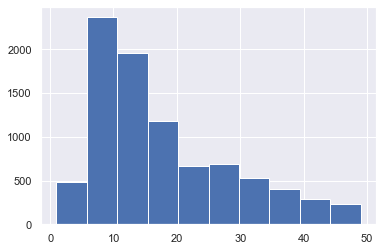

In [205]:
ppg[ppg['Estimated_Value']<50]['Estimated_Value'].hist()

In [244]:
ppg['Estimated_Value'].sort_values().head(60)

jeff-spicoli-trophy                                        1.0
sara-ryder-masked                                          1.0
father-of-ultra-vinyl-art-toys                             1.0
huntress-birds-of-prey-collectible-cards                   1.0
hulk-w-gauntlet-orange-chrome                              2.0
dryden-gangster                                            2.0
knight-of-ren-arm-cannon-vinyl-art-toys                    2.0
baron-samedi-vinyl-art-toys                                2.0
sho                                                        2.0
hulk-w-gauntlet-red-chrome                                 2.0
crossbones-civil-war-unmasked                              2.0
newt-scamander-wand                                        2.0
chupacabra-a864e794-f0bc-4a65-93a0-294e09820287            2.0
weeteef-cyubee                                             2.0
hank-pym                                                   2.0
sark-4dcc24a0-3698-46a1-a9f7-18c8246cda53              

In [245]:
ppg['Estimated_Value'].sort_values().tail(60)

mickey-mouse-black-and-white                                    2000.0
spider-man-metallic                                             2000.0
deadpool-gray-freddy-funko                                      2010.0
clone-trooper-blue-hair-freddy-funko                            2030.0
buzz-lightyear-w-zurg                                           2080.0
bone-daddy-red-suit-glow-in-the-dark                            2090.0
oogie-boogie-glow-in-the-dark                                   2140.0
jaime-lannister-freddy-funko                                    2140.0
leatherface-bloody-freddy-funko                                 2160.0
freddy-funko-daryl-dixon-bloody                                 2180.0
freddy-funko-toy-fair                                           2250.0
bumble-glow-in-the-dark-freddy-funko                            2260.0
loki-the-avengers                                               2260.0
batman-silver                                                   2300.0
green-